In [14]:
import lis2.skeletons.utils as utils
import os
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt


/home/benielli/Space/Projets/LIS2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
def show_fits_data(image_data, figsize=(10, 10)):
    if isinstance(image_data, str):
        # Open the FITS file
        hdul = fits.open(image_data)

        # Get the image data
        image_data = hdul[0].data

        hdul.close()

    # Set the figure size
    plt.figure(figsize=figsize)

    # Display the image
    plt.imshow(image_data, cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()

In [5]:
path_3Ddata = "../../../BIGSF_DATA/Clustering_COHRS/COHRS_10p50_0p00_CUBE_3T2_R2.fit"



In [6]:
path_3Ddata_reprojected = "../../../BIGSF_DATA/Clustering_COHRS/COHRS_reprojected_10p50_0p00_CUBE_3T2_R2.fit"


In [18]:
# path_spines = "../../../BIGSF_DATA/Clustering_COHRS/COHRS_labels_clustered.fits"
path_spines = "../../../BIGSF_DATA/Clustering_COHRS/new_full_mask_002011.fits"
path_skeleton = "../../../BIGSF_DATA/Clustering_COHRS/data_test/all_skeletons_all_clusters_data_3d_skeletons.fits"


In [24]:
data_3D = fits.open(path_3Ddata)
data_spine = fits.open(path_spines)
skeleton = fits.open(path_skeleton)
data_reproject = fits.open(path_3Ddata_reprojected)

In [57]:
print(data_3D[0].data.shape)
print(data_3D[0].header)

(788, 601, 301)
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  301 / length of data axis 1                          NAXIS2  =                  601 / length of data axis 2                          NAXIS3  =                  788 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H LBOUND1 =                 -599 / Pixel origin along axis 1                      LBOUND2 =                 -149 / Pixel origin along axis 2                      LBOUND3 =                 -331 / Pixel origin along axis 3                      LABEL   = 'T%s60+%v30+A%

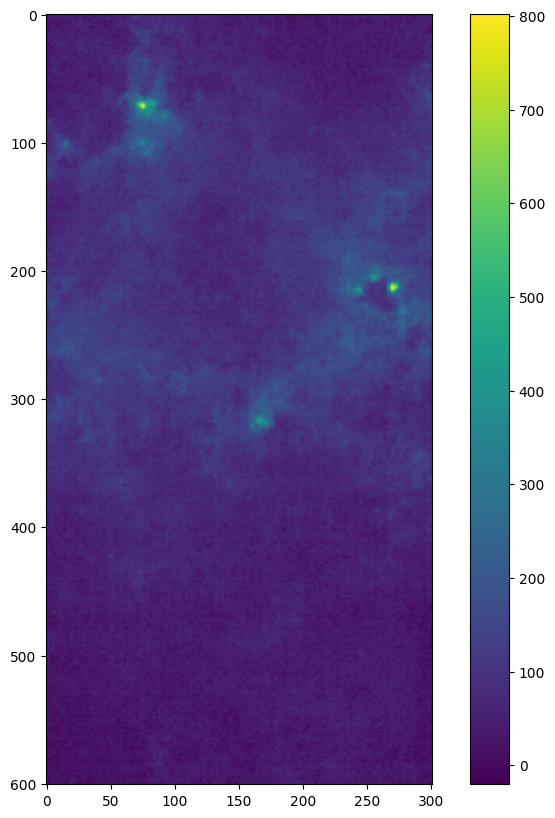

In [53]:

plt.figure(figsize=(10, 10))
plt.imshow(data_3D[0].data.sum(axis=0))
plt.colorbar()

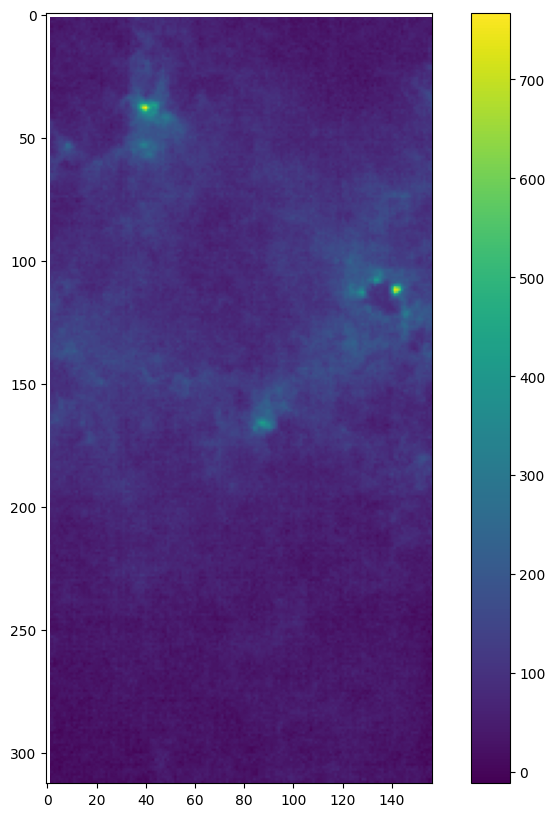

(788, 313, 157)


In [54]:
plt.figure(figsize=(10, 10))
plt.imshow(data_reproject[0].data.sum(axis=0))
plt.colorbar()
plt.show()
print(data_reproject[0].shape)

In [56]:
data_reproject[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  157                                                  
NAXIS2  =                  313                                                  
NAXIS3  =                  788                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =               1304.0 / Pixel coordinate of reference point            
CRPIX2  =                157.0 / Pixel coordinate of reference point            
CDELT1  =      -0.003194444444 / [deg] Coordinate increment at reference point  
CDELT2  =       0.003194444444 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

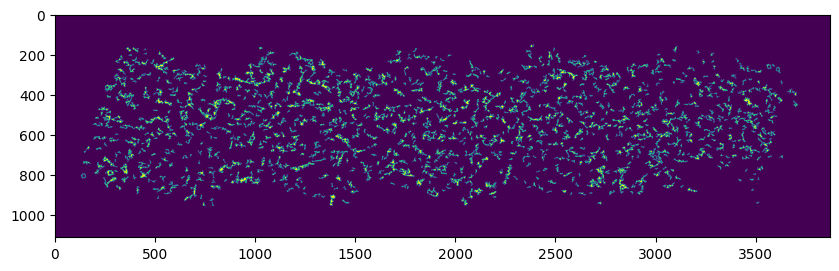

(1111, 3871)


In [46]:
plt.figure(figsize=(10, 10))
plt.imshow(data_spine[0].data)
plt.show()
print(data_spine[0].data.shape)


In [55]:
data_spine[0].header

SIMPLE  =                    T / Written by IDL:  Wed Oct  5 19:58:51 2016      
BITPIX  =                  -64 / 32-bit unsigned binary integer                 
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 3871                                                  
NAXIS2  =                 1111                                                  
CRPIX1  =              1935.00 /                                                
CRPIX2  =              556.000 /                                                
CRVAL1  =        6.58909000000 / Galactic longitude of reference pixel          
CRVAL2  =    -0.00539080000000 / Galactic latitude of reference pixel           
CDELT1  =    -0.00319444444400 /                                                
CDELT2  =     0.00319444444400 /                                                
CTYPE1  = 'GLON-CAR'           /                                                
CTYPE2  = 'GLAT-CAR'        

(788, 313, 157)


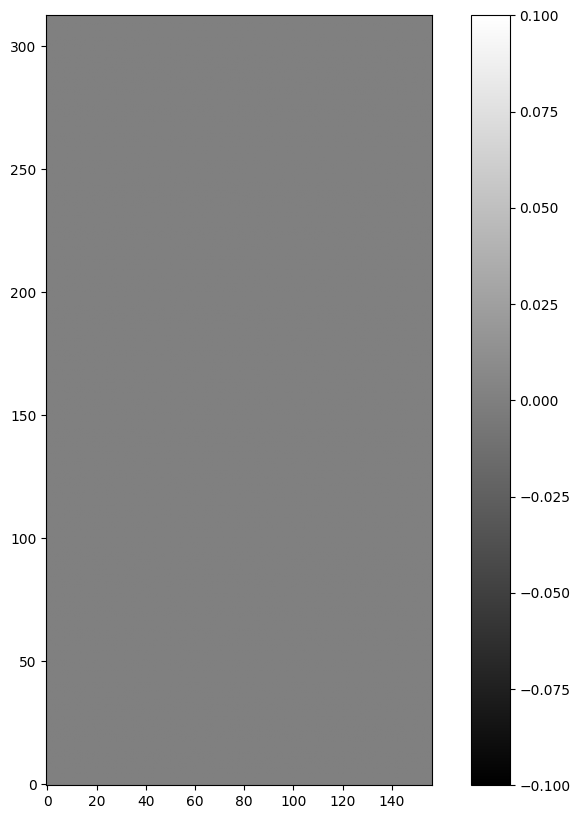

In [36]:
print(skeleton[0].data.shape)
show_fits_data(skeleton[0].data[0])

In [44]:
skeleton[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  157                                                  
NAXIS2  =                  313                                                  
NAXIS3  =                  788                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =               1304.0 / Pixel coordinate of reference point            
CRPIX2  =                157.0 / Pixel coordinate of reference point            
CDELT1  =      -0.003194444444 / [deg] Coordinate increment at reference point  
CDELT2  =       0.003194444444 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

In [58]:
print(skeleton[0].header)
skeleton[0].data.shape


SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  157                                                  NAXIS2  =                  313                                                  NAXIS3  =                  788                                                  WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =               1304.0 / Pixel coordinate of reference point            CRPIX2  =                157.0 / Pixel coordinate of reference point            CDELT1  =      -0.003194444444 / [deg] Coordinate increment at reference point  CDELT2  =       0.003194444444 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'                / Units of coordinate increment and value        CUNIT2  = 'deg'                / Units o

(788, 313, 157)

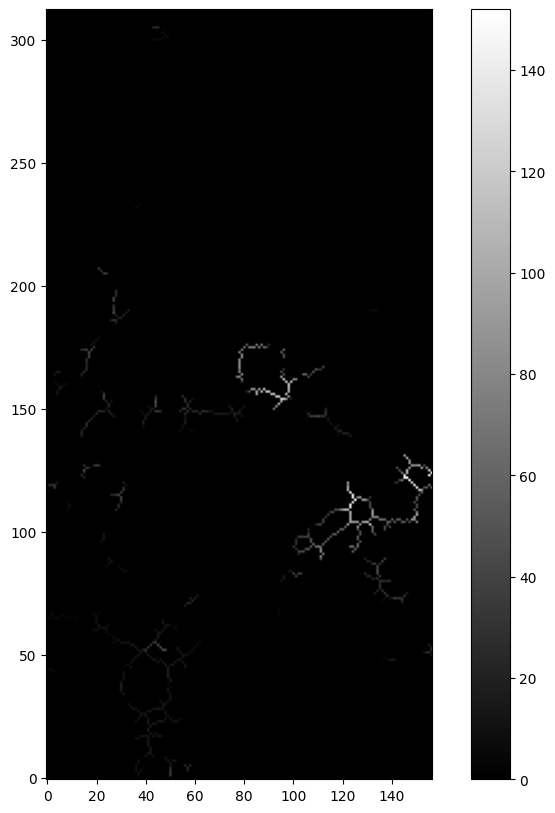

In [49]:
sum_skelette = skeleton[0].data.sum(axis=0)
show_fits_data(sum_skelette)